In [1]:
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Data Augumentation"



In [2]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [3]:

from google.colab import drive
drive.mount('/content/drive')

!ls /content/drive/MyDrive/

!cp -r /content/drive/MyDrive/archive /content/



Mounted at /content/drive
'analyse de donnée'			    model.pth
 books_1.Best_Books_Ever.gsheet		    mon.drawio
 Classroom				    movies_metadata.gsheet
'Colab Notebooks'			    mrlEyes_2018_01
 ColabNotebooks-20231227T212143Z-001	   'mrlEyes_2018_01 (1)'
 DataForProject				    oleag-region.gsheet
 diplomes.pdf				   'petal-20230814-183020_XMxohv9J (1).mp4'
'donnees_etudiantsMasterLight (1).gsheet'   petal-20230814-183020_XMxohv9J.mp4
 donnees_etudiantsMasterLight.gsheet	    pfeMbisd
 drowsiness				    projet_java_ben_madane_khadija
 Drowsiness_Detection_project		    python
 Drowsiness-Detection-Project-main	    python_projet
 ETUDPROF				    ratings_small.gsheet
 Gp					    relevés_de_notes_compressed.pdf
'Gr bisd 4.zip'				    Releves_de_notes.pdf
 GroupeNumeroX.gslides			    satisfaction_hopital2.gsheet
 inbound2356383993118915541.pdf		    tourPedia_paris.json
 inbound2579097299691613459.pdf		    tour-Pedia_paris.json_.rar
 inbound7864871142091566244.pdf		    tour-Pedia_paris.json_.z

In [2]:
 train_datagen=ImageDataGenerator(rescale=1./255, rotation_range=0.2,shear_range=0.2,
   zoom_range=0.2,width_shift_range=0.2,
   height_shift_range=0.2, validation_split=0.2)
 batchsize = 32
 train_data= train_datagen.flow_from_directory(r'/content/drive/MyDrive/ColabNotebooks-20231227T212143Z-001/ColabNotebooks/drive-download-data/Train',
                                target_size=(146,146),batch_size=batchsize,class_mode='categorical',subset='training' )

 validation_data= train_datagen.flow_from_directory(r'/content/drive/MyDrive/ColabNotebooks-20231227T212143Z-001/ColabNotebooks/drive-download-data/Train',
                                   target_size=(146,146),batch_size=batchsize,class_mode='categorical', subset='validation')

Found 1086 images belonging to 2 classes.
Found 271 images belonging to 2 classes.


In [3]:
 test_datagen = ImageDataGenerator(rescale=1./255)

 test_data = test_datagen.flow_from_directory(r'/content/drive/MyDrive/ColabNotebooks-20231227T212143Z-001/ColabNotebooks/drive-download-data/Test/test',
                               target_size=(146,146),batch_size=batchsize,class_mode='categorical')

Found 105 images belonging to 2 classes.


In [4]:
bmodel = InceptionV3(include_top=False, weights='imagenet', input_tensor=Input(shape=(146,146,3)))
hmodel = bmodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(128, activation='relu')(hmodel)  # Couche Dense supplémentaire
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)

hmodel = Dense(2, activation='softmax')(hmodel)
model = Model(inputs=bmodel.input, outputs= hmodel)
for layer in bmodel.layers:
      layer.trainable = False

In [5]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 146, 146, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 72, 72, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 72, 72, 32)     │             96 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 72, 72, 32)     │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 70, 70, 32)     │          9,216 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 70, 70, 32)     │             96 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 70, 70, 32)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 70, 70, 64)     │         18,432 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 70, 70, 64)     │            192 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 70, 70, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 34, 34, 64)     │              0 │ activation_2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 34, 34, 80)     │          5,120 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 34, 34, 80)     │            240 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 34, 34, 80)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 32, 32, 192)    │        138,240 │ activation_3[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_4     │ (None, 32, 32, 192)    │            576 │ conv2d_4[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_4 (Activat

 Total params: 24,170,594 (92.20 MB)

 Trainable params: 2,367,810 (9.03 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [6]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau

In [7]:
#checkpoint = ModelCheckpoint(r'/content/drive/MyDrive/ColabNotebooks/model.h5',
                #               monitor='val_loss',save_best_only=True,verbose=3)

earlystop = EarlyStopping(monitor = 'val_loss', patience=7, verbose= 3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor= 'val_loss', patience=3, verbose= 3, )

callbacks=[earlystop,learning_rate]

In [8]:
from tensorflow.keras.optimizers import Adam

#model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Compile le modèle
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîne le modèle avec les données d'entraînement et de validation
history = model.fit(train_data,
                    steps_per_epoch=train_data.samples // batchsize,
                    validation_data=validation_data,
                    validation_steps=validation_data.samples // batchsize,
                    callbacks=callbacks,
                    epochs=30)


Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step - accuracy: 0.6136 - loss: 3.5438 - val_accuracy: 0.9453 - val_loss: 0.2057 - learning_rate: 0.0010
Epoch 2/30
 1/33 ━━━━━━━━━━━━━━━━━━━━ 59s 2s/step - accuracy: 0.8125 - loss: 0.4498

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.8125 - loss: 0.4498 - val_accuracy: 1.0000 - val_loss: 0.1229 - learning_rate: 0.0010
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.8429 - loss: 0.4700 - val_accuracy: 0.9414 - val_loss: 0.1366 - learning_rate: 0.0010
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.9062 - loss: 0.1594 - val_accuracy: 1.0000 - val_loss: 0.0295 - learning_rate: 0.0010
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 77s 2s/step - accuracy: 0.8629 - loss: 0.2606 - val_accuracy: 0.9727 - val_loss: 0.0927 - learning_rate: 0.0010
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9062 - loss: 0.1344 - val_accuracy: 0.8667 - val_loss: 0.4129 - learning_rate: 0.0010
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8856 - loss: 0.2955
Epoch 7: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
33/33 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.8862 - loss: 0.2938 - val_accuracy: 0.9648 -

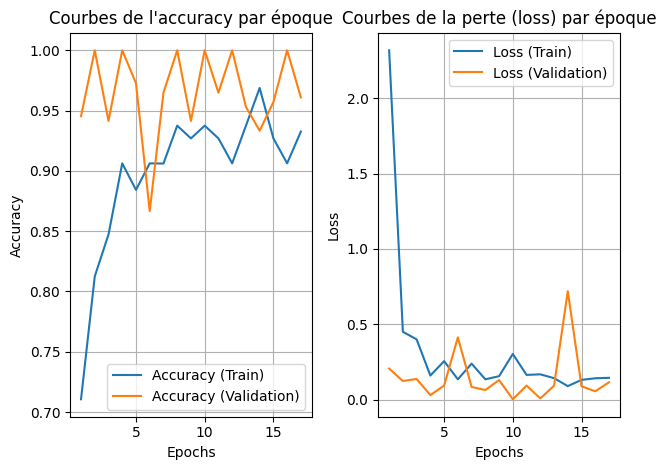

In [9]:
import matplotlib.pyplot as plt  # Importation de matplotlib
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']
# Courbes d'accuracy
plt.subplot(1, 2, 1)  # Crée un sous-graphique pour l'accuracy
plt.plot(range(1, len(train_accuracy) + 1), train_accuracy, label='Accuracy (Train)')
plt.plot(range(1, len(val_accuracy) + 1), val_accuracy, label='Accuracy (Validation)')
plt.title('Courbes de l\'accuracy par époque')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Courbes de loss
plt.subplot(1, 2, 2)  # Crée un sous-graphique pour la loss
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Loss (Train)')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Loss (Validation)')
plt.title('Courbes de la perte (loss) par époque')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Afficher les graphiques
plt.tight_layout()
plt.show()


In [ ]:
# Model Evaluation

In [10]:
# Évaluation sur l'ensemble d'entraînement
train_loss, train_accuracy = model.evaluate(train_data)
print(f"Training loss: {train_loss}, Training accuracy: {train_accuracy}")

# Évaluation sur l'ensemble de validation
val_loss, val_accuracy = model.evaluate(validation_data)
print(f"Validation loss: {val_loss}, Validation accuracy: {val_accuracy}")


34/34 ━━━━━━━━━━━━━━━━━━━━ 61s 2s/step - accuracy: 0.9829 - loss: 0.0445
Training loss: 0.04521189257502556, Training accuracy: 0.9843462109565735
9/9 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.9614 - loss: 0.0777
Validation loss: 0.08555720746517181, Validation accuracy: 0.9630996584892273


In [11]:
# Évaluation sur l'ensemble de test
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9639 - loss: 0.1748
Test loss: 0.16695910692214966, Test accuracy: 0.961904764175415


Found 105 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step
Mapping des classes: {'closed': 0, 'open': 1}


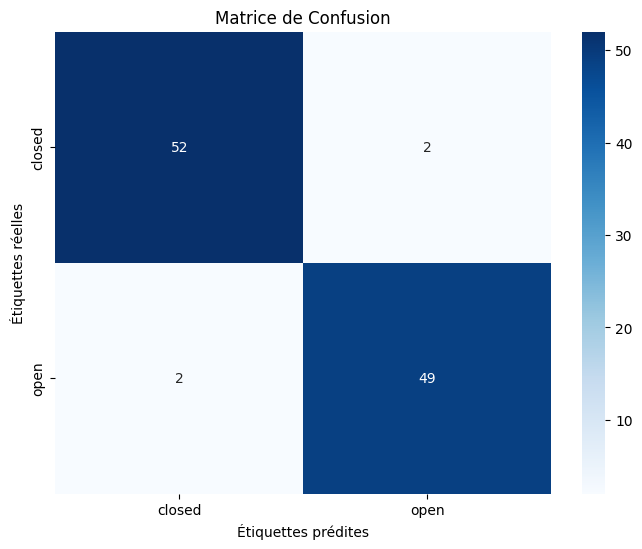

Rapport de Classification:
               precision    recall  f1-score   support

      closed       0.96      0.96      0.96        54
        open       0.96      0.96      0.96        51

    accuracy                           0.96       105
   macro avg       0.96      0.96      0.96       105
weighted avg       0.96      0.96      0.96       105

Accuracy calculée manuellement: 0.9619
Test loss: 0.1670, Test accuracy: 0.9619


In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Étape 1: Préparation des données de test
batchsize = 32

test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    r'/content/drive/MyDrive/ColabNotebooks-20231227T212143Z-001/ColabNotebooks/drive-download-data/Test/test',
    target_size=(146, 146),
    batch_size=batchsize,
    class_mode='categorical',
    shuffle=False  # Assurez-vous que l'ordre est préservé
)

# Étape 2: Prédiction des classes sur l'ensemble de test
test_data.reset()  # Réinitialiser l'ordre des indices
predictions = model.predict(test_data)
y_pred = np.argmax(predictions, axis=1)

# Étape 3: Obtenir les vraies étiquettes
y_true = test_data.classes

# Étape 4: Affichage des classes
class_labels = list(test_data.class_indices.keys())
print("Mapping des classes:", test_data.class_indices)

# Étape 5: Matrice de confusion
conf_matrix = confusion_matrix(y_true, y_pred)

# Affichage de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Étiquettes prédites')
plt.ylabel('Étiquettes réelles')
plt.title('Matrice de Confusion')
plt.show()

# Étape 6: Rapport de classification
report = classification_report(y_true, y_pred, target_names=class_labels)
print("Rapport de Classification:\n", report)

# Étape 7: Calcul manuel de l'accuracy
manual_accuracy = np.sum(y_pred == y_true) / len(y_true)
print(f"Accuracy calculée manuellement: {manual_accuracy:.4f}")

# Étape 8: Évaluation directe du modèle
test_loss, test_accuracy = model.evaluate(test_data, verbose=0)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")
